In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [132]:
df=pd.read_csv('household_power_consumption.txt',sep=';',parse_dates=True,low_memory=False)

In [133]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [134]:
df['datetime']=df['Date'].str.cat(df['Time'],sep=' ')
df.drop(columns=['Date','Time'],inplace=True)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.430,4.000,0.000,0.000,0.0,26/11/2010 20:58:00
2075255,0.944,0.000,240.000,4.000,0.000,0.000,0.0,26/11/2010 20:59:00
2075256,0.938,0.000,239.820,3.800,0.000,0.000,0.0,26/11/2010 21:00:00
2075257,0.934,0.000,239.700,3.800,0.000,0.000,0.0,26/11/2010 21:01:00


In [135]:
df.set_index(['datetime'],inplace=True)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
26/11/2010 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
26/11/2010 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
26/11/2010 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [136]:
df.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [137]:
df.replace('?',np.nan,inplace=True)

In [138]:
df=df.astype('float')


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [140]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [141]:
df.fillna(method='ffill', inplace=True)

C:\Users\saleh\AppData\Local\Temp\ipykernel_5088\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [142]:
# def fill_missing(df):
#     one_day=24*60
#     for row in range(df.shape[0]):
#         for col in range(df.shape[1]):
#             if np.isnan(df[row,col]):
#                 df[row,col]=df[(row-1),col]


In [143]:
# fill_missing(df.values)

In [144]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [145]:
df.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
16/12/2006 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
16/12/2006 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
16/12/2006 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
16/12/2006 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [147]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.086168e+00,1.233280e-01,2.408416e+02,4.604226e+00,1.110995e+00,1.287958e+00,6.416570e+00
std,1.053172e+00,1.125144e-01,3.235574e+00,4.426775e+00,6.115908e+00,5.786865e+00,8.419505e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.980000e-01,1.000000e-01,2.410200e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.524000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [148]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### Prepare power consumption for each day

In [149]:
df.to_csv('clean_df.csv')

In [150]:
dataset=pd.read_csv('clean_df.csv',parse_dates=True,index_col='datetime',low_memory=False)

C:\Users\saleh\AppData\Local\Temp\ipykernel_5088\1767030570.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset=pd.read_csv('clean_df.csv',parse_dates=True,index_col='datetime',low_memory=False)


In [151]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


### EDA

In [152]:
df=dataset.resample('D').sum()

In [153]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0


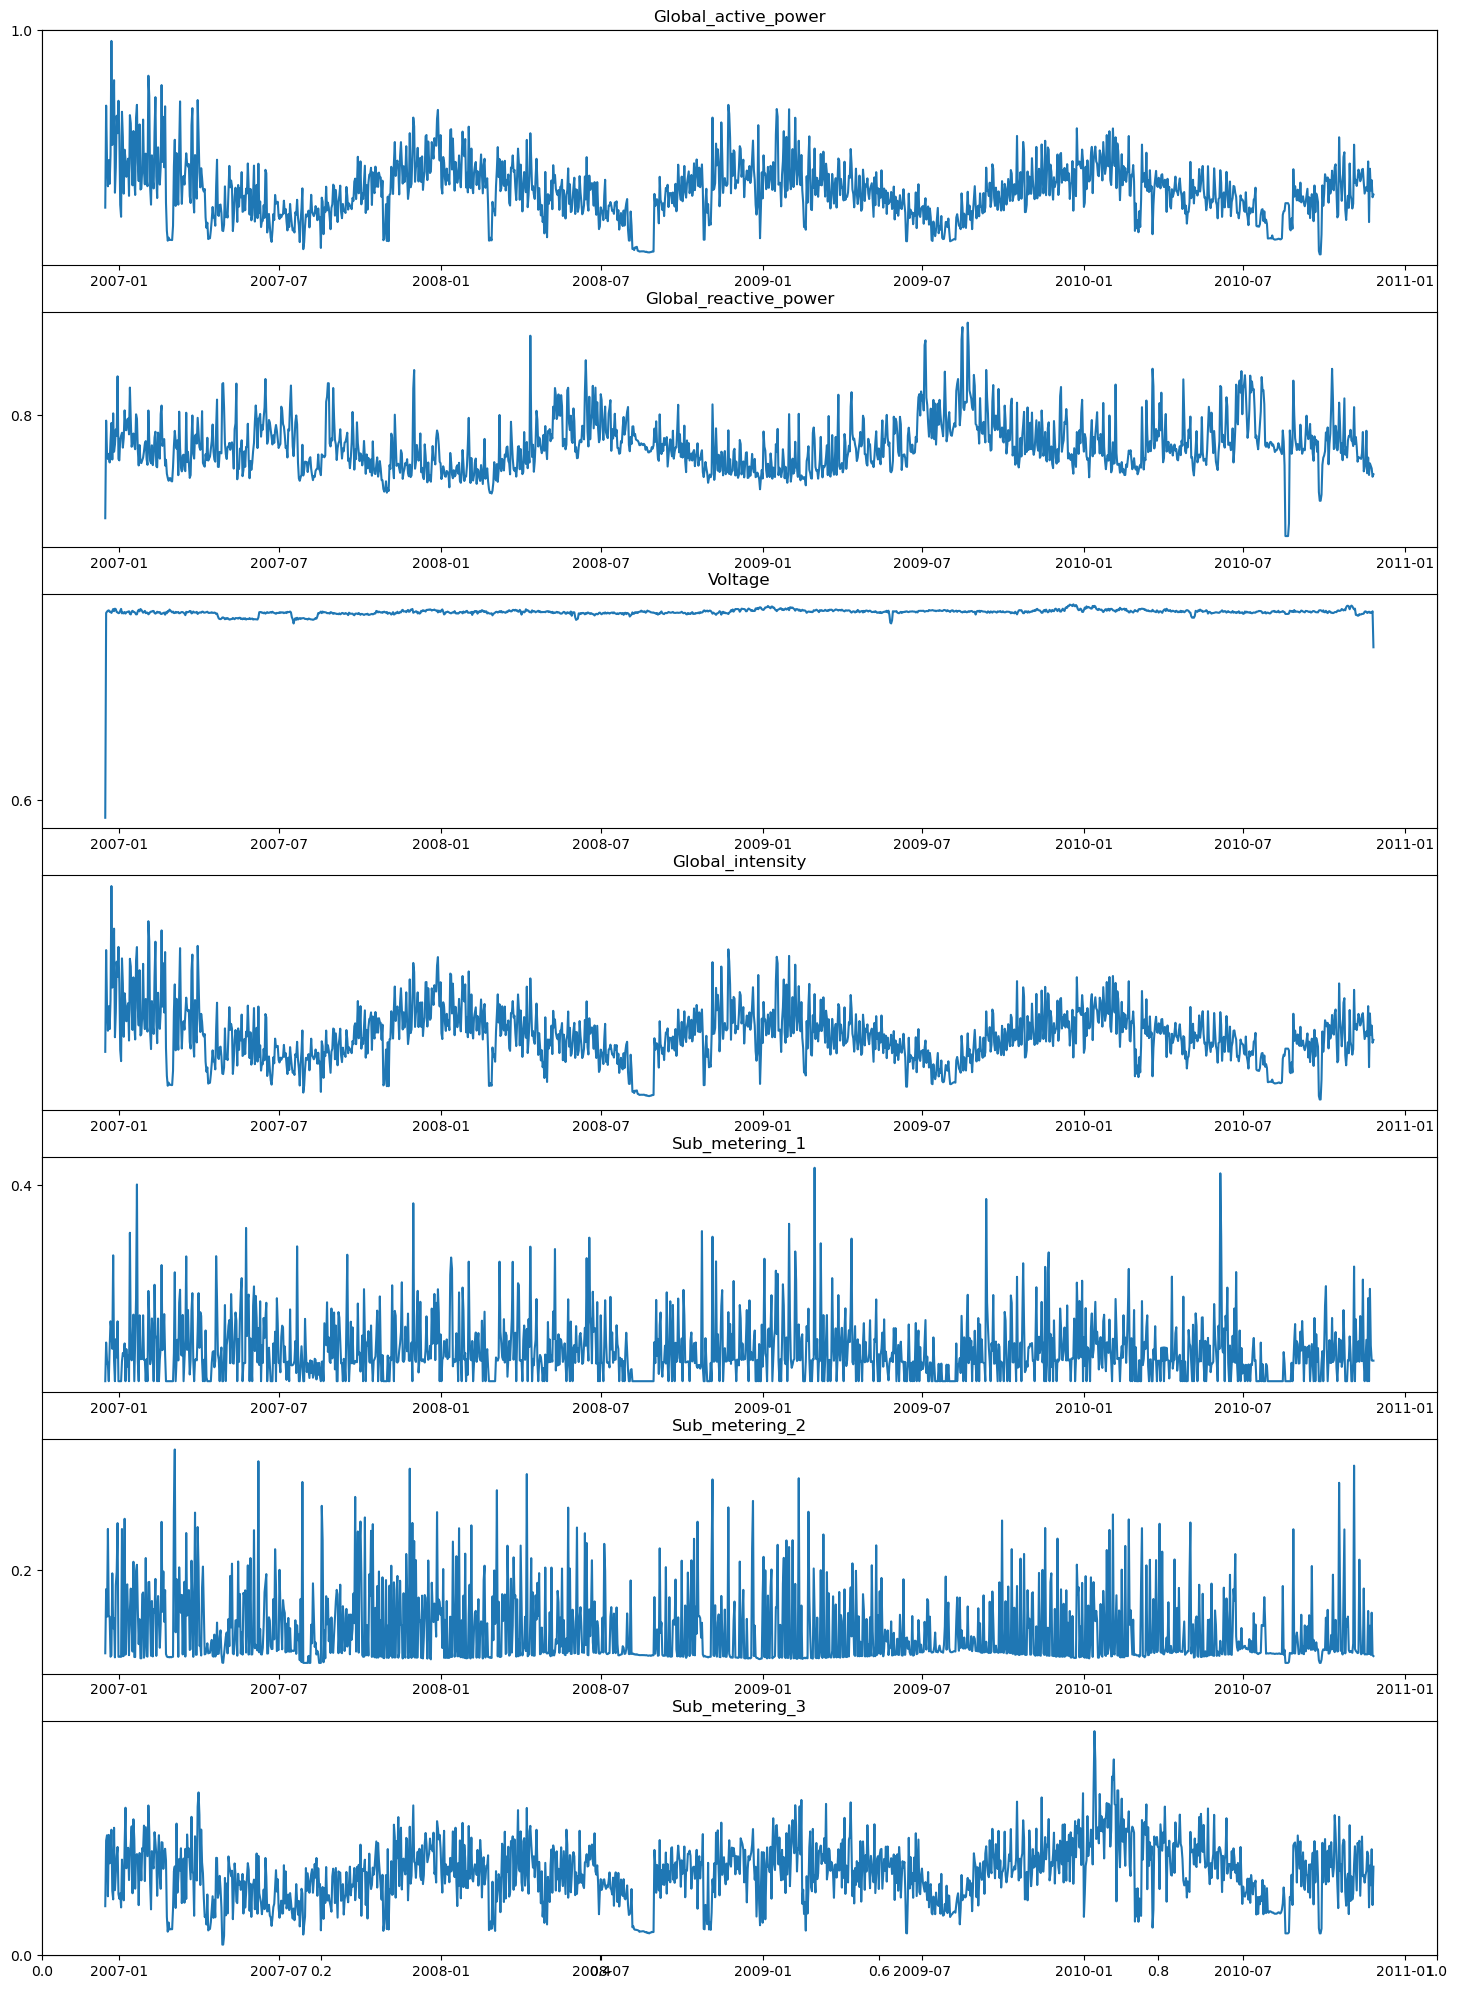

In [154]:
fig,ax=plt.subplots(figsize=(18,25))
for i in range(len(df.columns)):
    plt.subplot(len(df.columns),1,i+1)
    name=df.columns[i]
    plt.plot(df[name])
    plt.title(name)
    plt.yticks([])
plt.show()
fig.tight_layout()

### Exploring active power consumption for each year

In [155]:
years=[2007,2008,2009,2010]
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0


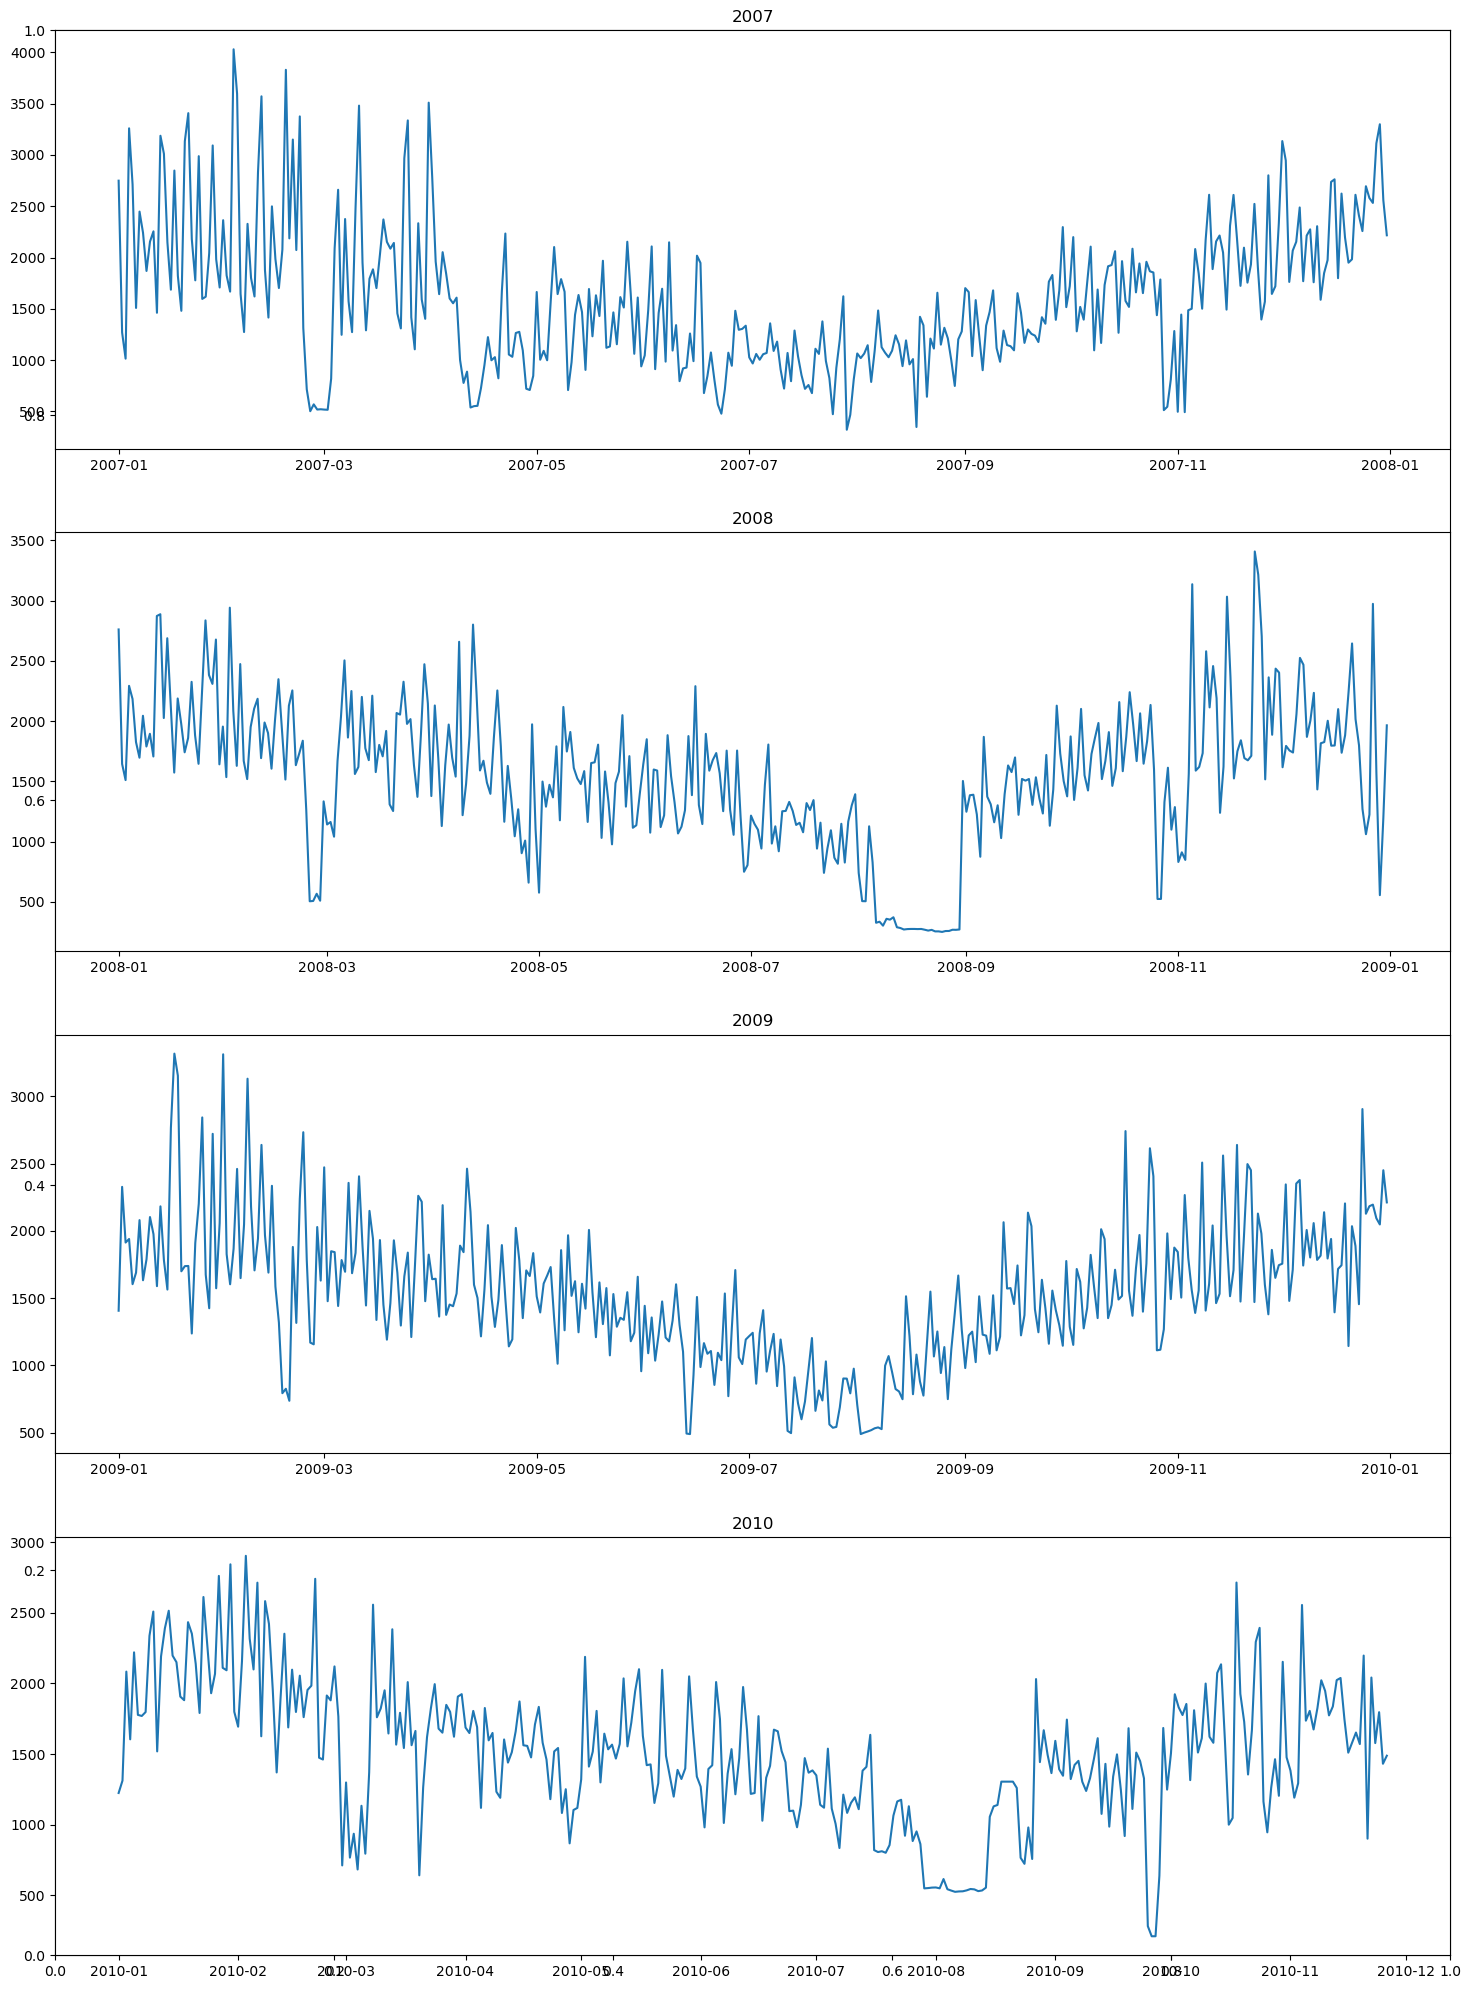

In [156]:
fig,ax=plt.subplots(figsize=(18,25))
for i in range(len(years)):  
    plt.subplot(len(years),1,i+1)
    year=years[i]
    plt.plot(df[df.index.year==year]['Global_active_power'])
    plt.title(str(year))
plt.show()


### Power Compsumption as a histogram

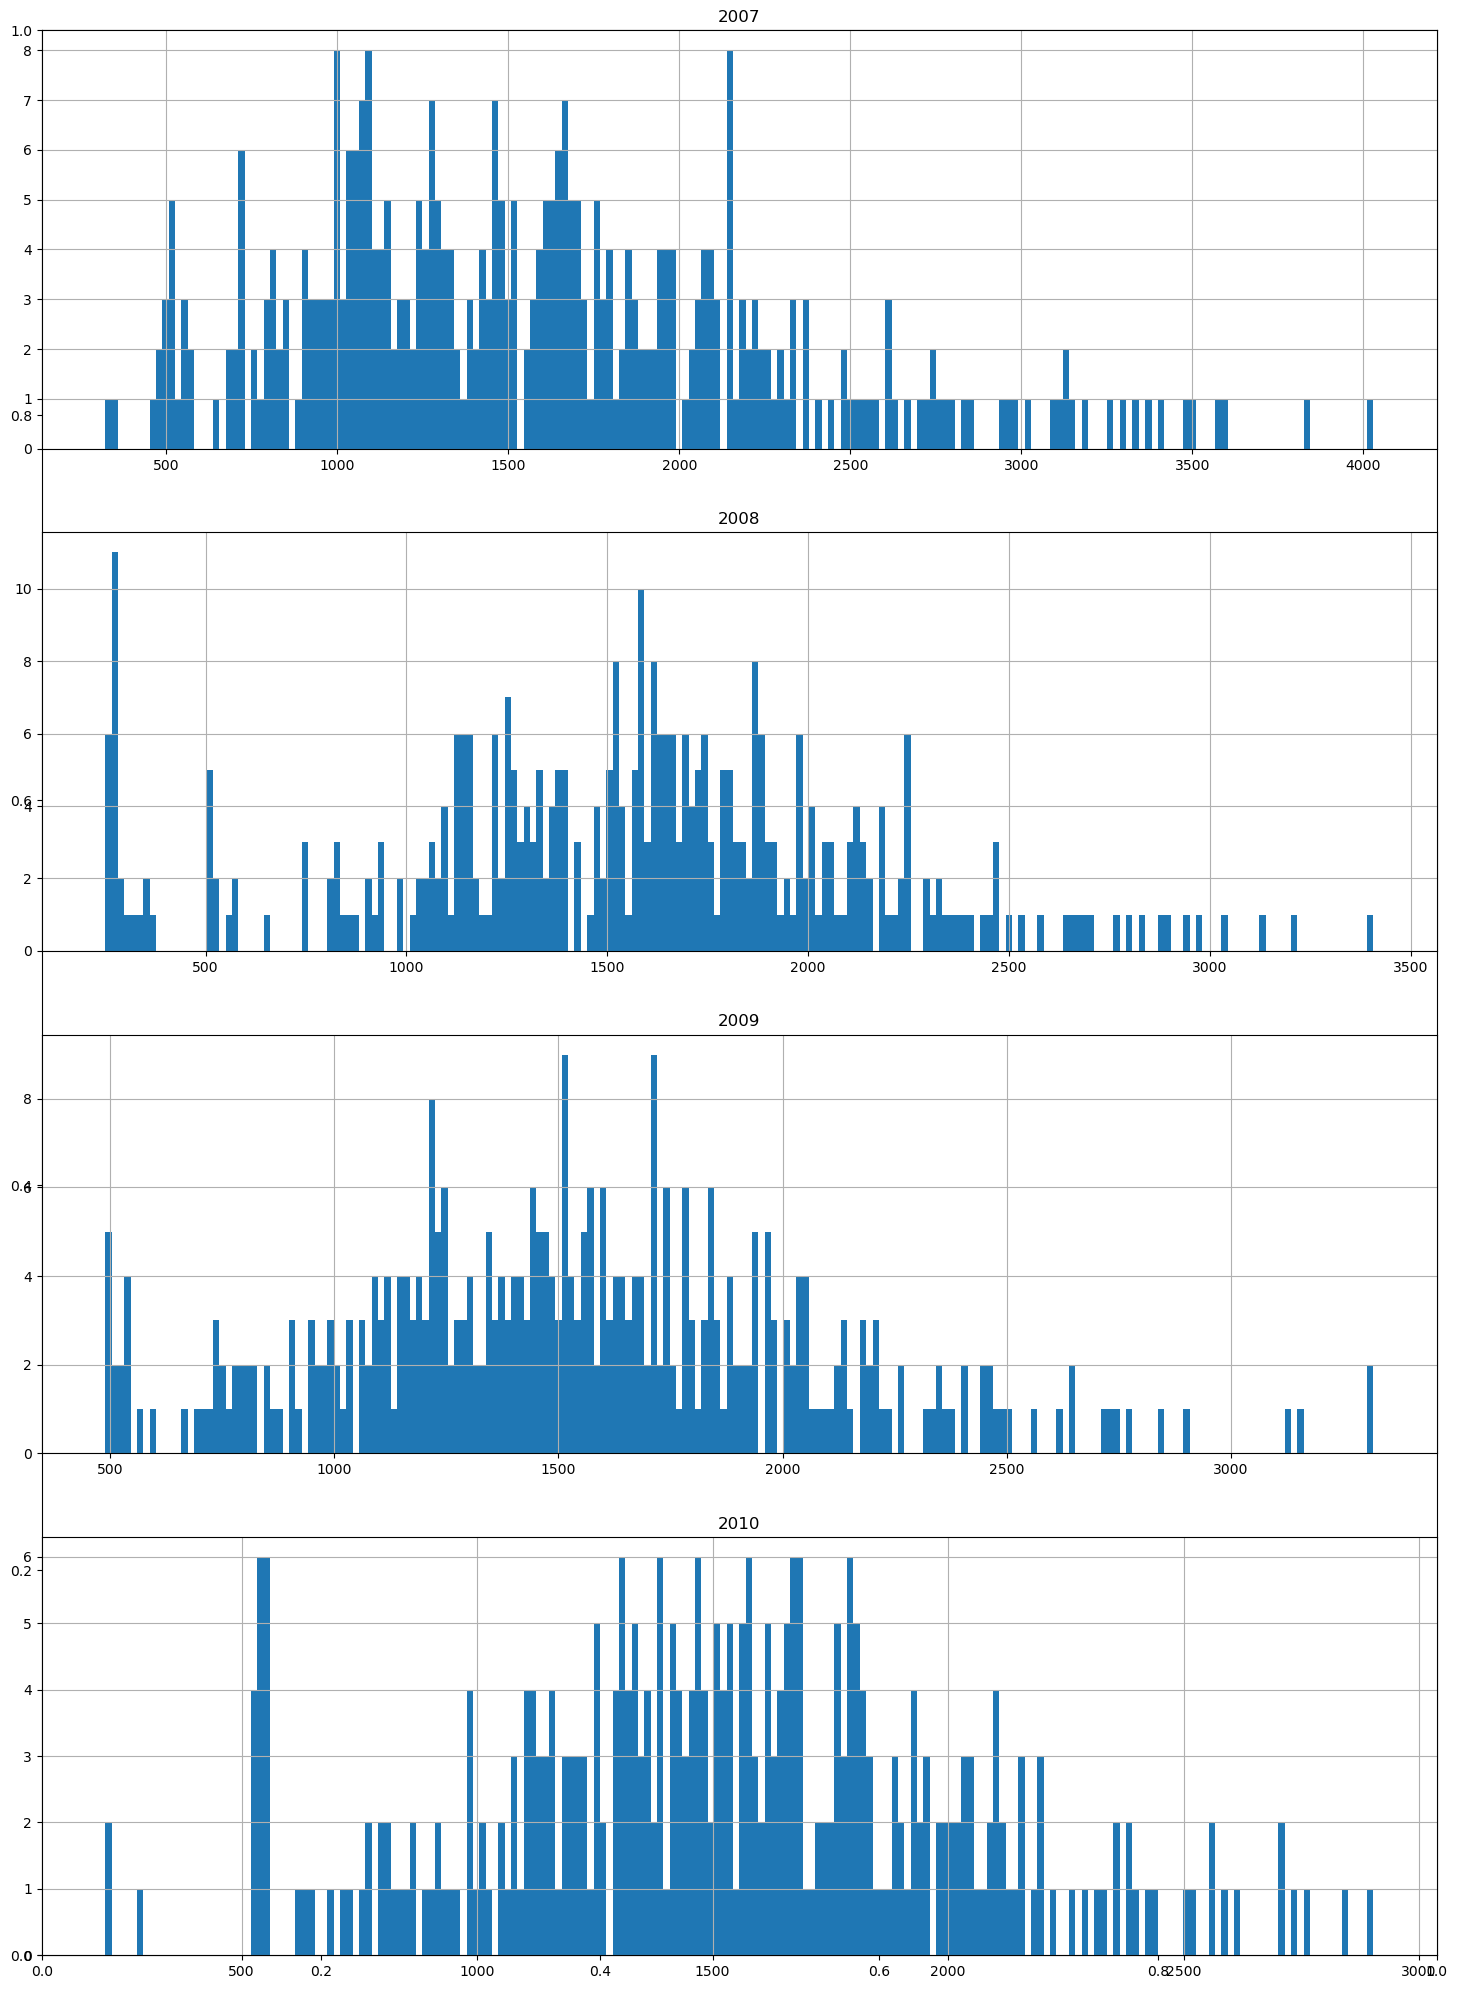

In [157]:
fig,ax=plt.subplots(figsize=(18,25))
for i in range(len(years)):  
    plt.subplot(len(years),1,i+1)
    year=years[i]
    df[df.index.year==year]['Global_active_power'].hist(bins=200)
    plt.title(str(year))
plt.show()

### For full data

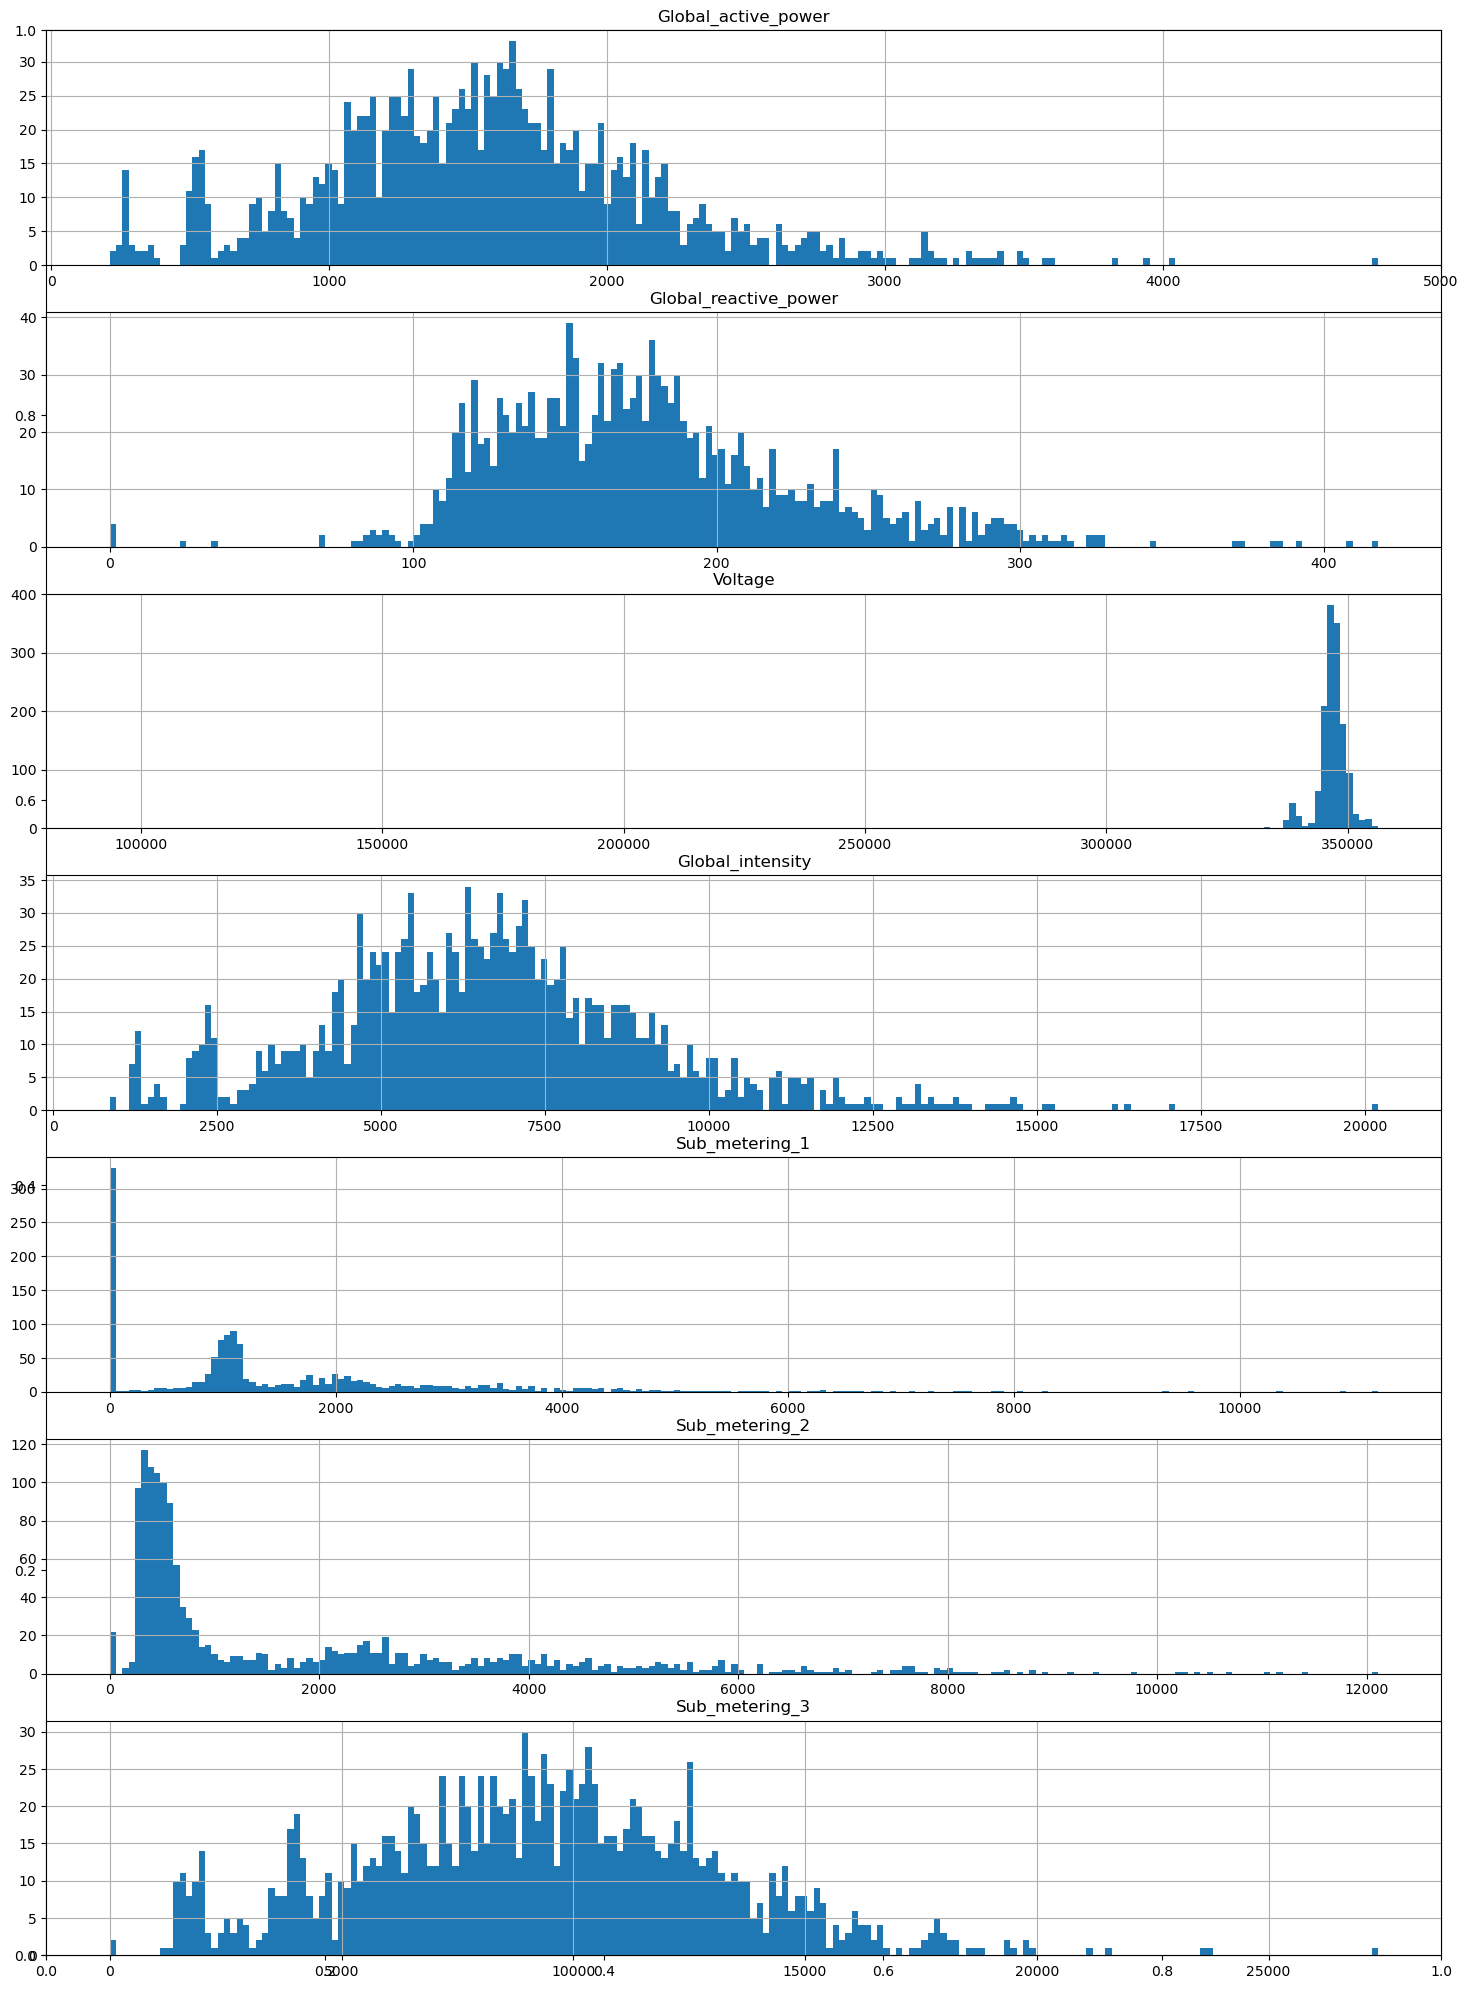

In [158]:
fig,ax=plt.subplots(figsize=(18,25))
for i in range(len(df.columns)):
    plt.subplot(len(df.columns),1,i+1)
    name=df.columns[i]
    df[name].hist(bins=200)
    plt.title(name)
    # plt.yticks([])
plt.show()
fig.tight_layout()

### plot power consumption hist for each month of 2007

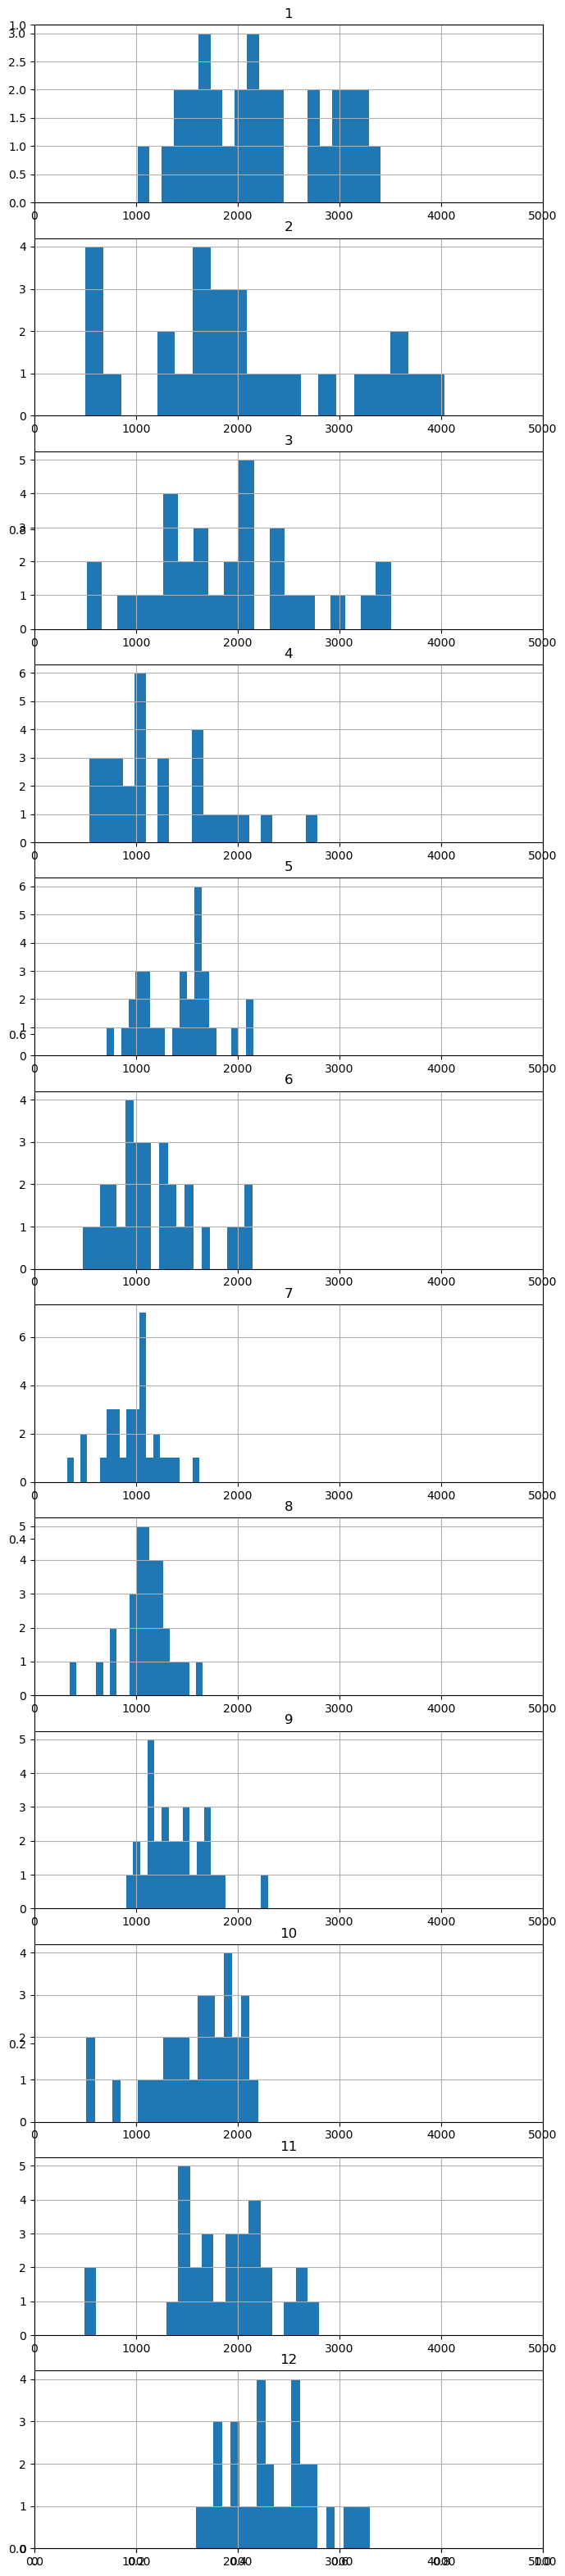

In [159]:
months=[i for i in range(1,13)]
df_year_2007=df[df.index.year==2007]

fig,ax=plt.subplots(figsize=(8,40))
for i in range(len(months)):
    ax=plt.subplot(len(months),1,i+1)
    month=months[i]
    df_year_2007[df_year_2007.index.month==month]['Global_active_power'].hist(bins=20)
    ax.set_xlim(0,5000)
    plt.title(str(month))
plt.show()

#### Active Power Uses Prediction

 _What can we predict_
* Forecast hourly consumption for the next day
* Forecast daily consumption for the next week
* Forecast daily consumption for the next month
* Forecast monthly consumption for the next year

### Prediction of the next week daily consumption using previous week

In [160]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [161]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0
2010-11-25,1431.164,116.128,347812.21,6004.0,1076.0,426.0,5072.0
2010-11-26,1488.104,120.826,303487.57,6259.8,1080.0,385.0,9989.0


In [162]:
#data till 2009 - training
#data till 2010 - testing

df_train=df[df.index.year<=2009]
df_test=df[df.index.year==2010]

In [163]:
df_train.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2009-12-27,2195.452,207.164,349439.10,9165.2,4218.0,318.0,12450.0
2009-12-28,2094.098,181.668,351039.76,8688.0,2175.0,2063.0,14934.0
2009-12-29,2047.968,242.050,350183.54,8514.2,1260.0,346.0,10205.0
2009-12-30,2451.110,266.794,347115.21,10322.6,5284.0,4539.0,12484.0
2009-12-31,2211.892,186.612,346980.70,9218.4,0.0,387.0,19409.0


In [164]:
df_train=df_train['Global_active_power']
df_test=df_test['Global_active_power']

In [165]:
df_train.shape

(1112,)

In [166]:
df_test.shape

(330,)

### Prepare Training data

In [167]:
df_train.head(14)

datetime
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
2006-12-21    1717.112
2006-12-22    2341.338
2006-12-23    4773.386
2006-12-24    2550.012
2006-12-25    2743.120
2006-12-26    3934.110
2006-12-27    1528.760
2006-12-28    2072.638
2006-12-29    3174.392
Freq: D, Name: Global_active_power, dtype: float64

In [168]:
df_train=np.array(df_train)

In [169]:
x_train,y_train=[],[]

for i in range(7,len(df_train)-7):
    x_train.append(df_train[i-7:i])
    y_train.append(df_train[i:i+7])

In [170]:
x_train=np.array(x_train)
y_train=np.array(y_train)
                

In [171]:
pd.DataFrame(y_train)


,0,1,2,3,4,5,6
0,4773.386,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392
1,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392,2801.738
2,2743.120,3934.110,1528.760,2072.638,3174.392,2801.738,3494.196
3,3934.110,1528.760,2072.638,3174.392,2801.738,3494.196,2749.004
4,1528.760,2072.638,3174.392,2801.738,3494.196,2749.004,1269.236
...,...,...,...,...,...,...,...
1093,1144.166,2034.966,1888.022,1455.200,2905.894,2127.648,2183.618
1094,2034.966,1888.022,1455.200,2905.894,2127.648,2183.618,2195.452
1095,1888.022,1455.200,2905.894,2127.648,2183.618,2195.452,2094.098
1096,1455.200,2905.894,2127.648,2183.618,2195.452,2094.098,2047.968


In [172]:
x_scaler=MinMaxScaler()
x_train=x_scaler.fit_transform(x_train)


In [173]:
y_scaler=MinMaxScaler()
y_train=y_scaler.fit_transform(y_train)

In [174]:
x_train.shape

(1098, 7)

In [175]:
x_train=x_train.reshape(1098,7,1)

In [176]:
x_train.shape

(1098, 7, 1)

### Build the model



In [404]:
reg=Sequential()
reg.add(LSTM(units=100,activation='tanh',input_shape=(7,1)))
reg.add(Dropout(0.2))  
reg.add(Dense(7))



In [405]:
from keras.optimizers import Adam  
reg.compile(loss='mse',optimizer=Adam(learning_rate=0.0001))

In [406]:
reg.fit(x_train,y_train,epochs=50)

Epoch 1/50
35/35 [==============================] - 2s 10ms/step - loss: 0.1354
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1054
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0715
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0359
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0217
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0204
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0205
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0201
Epoch 9/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0201
Epoch 10/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0197
Epoch 11/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0200
Epoch 12/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0199
Epoch 13/50
35/35 [=============================

In [407]:
df_test=np.array(df_test)

In [408]:
x_test,y_test=[],[]

for i in range(7,len(df_test)-7):
    x_test.append(df_test[i-7:i])
    y_test.append(df_test[i:i+7])

In [409]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [410]:
x_test

array([[1224.252, 1311.806, 2083.454, ..., 2219.78 , 1777.18 , 1769.442],
       [1311.806, 2083.454, 1604.132, ..., 1777.18 , 1769.442, 1797.208],
       [2083.454, 1604.132, 2219.78 , ..., 1769.442, 1797.208, 2336.9  ],
       ...,
       [1946.534, 1773.592, 1836.822, ..., 2038.392, 1747.382, 1509.748],
       [1773.592, 1836.822, 2023.174, ..., 1747.382, 1509.748, 1582.032],
       [1836.822, 2023.174, 2038.392, ..., 1509.748, 1582.032, 1652.152]])

In [411]:
x_test=x_scaler.transform(x_test)
y_test=y_scaler.transform(y_test)

In [412]:
x_test=x_test.reshape(316,7,1)

In [413]:
y_pred=reg.predict(x_test)

10/10 [==============================] - 0s 3ms/step


In [414]:
y_test

array([[0.34200307, 0.55209524, 0.59748999, ..., 0.51337452, 0.56625084,
        0.59900927],
       [0.46132244, 0.59748999, 0.33560299, ..., 0.56625084, 0.59900927,
        0.51501552],
       [0.49925361, 0.33560299, 0.51337452, ..., 0.59900927, 0.51501552,
        0.50267289],
       ...,
       [0.29443027, 0.37091737, 0.34928656, ..., 0.17214581, 0.47394471,
        0.35117468],
       [0.30993295, 0.34928656, 0.5150806 , ..., 0.47394471, 0.35117468,
        0.40904381],
       [0.29185857, 0.5150806 , 0.17214581, ..., 0.35117468, 0.40904381,
        0.31244602]])

In [415]:
y_pred

array([[0.30831936, 0.37640414, 0.37452883, ..., 0.3727141 , 0.3669188 ,
        0.37106913],
       [0.3252323 , 0.39333805, 0.39011234, ..., 0.38915744, 0.3840779 ,
        0.3854525 ],
       [0.34539935, 0.41571075, 0.41163862, ..., 0.40689355, 0.40426767,
        0.40696007],
       ...,
       [0.3368475 , 0.40431517, 0.39971524, ..., 0.4012109 , 0.39610487,
        0.39360368],
       [0.32843888, 0.39348003, 0.38927156, ..., 0.39171678, 0.38758117,
        0.38473463],
       [0.32347515, 0.3868915 , 0.38281852, ..., 0.38527542, 0.3828535 ,
        0.37990505]], dtype=float32)

In [416]:
y_pred=y_scaler.inverse_transform(y_pred)

In [417]:
y_true=y_scaler.inverse_transform(y_test)

### Evaluate Model

In [418]:
from sklearn.metrics import mean_squared_error  

rmse = np.sqrt(mean_squared_error(y_true, y_pred))  
print(f'RMSE: {rmse:.4f}')

RMSE: 406.5913


In [419]:
np.std(y_true[0])

353.0376107197275